<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#0e92ea"> Credit Card Customer Segmentation

<font color=darkblue>
   
### Background:
    
AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help.
    
&nbsp;
    
### Data Discription:
    
Data is of various customers of a bank with their credit limit, the total number of credit cards the customer has, and different channels through which customer has contacted the bank for any queries, different channels include visiting the bank, online and through a call.
<ul>
    <li>Customer key - Identifier for the customer</li>
    <li>Average Credit Limit - Average credit limit across all the credit cards</li>
    <li>Total credit cards - Total number of credit cards</li>
    <li>Total visits bank - Total number of bank visits</li>
    <li>Total visits online - total number of online visits</li>
    <li>Total calls made - Total number of calls made by the customer</li>
</ul>
    
&nbsp;
    
### Domain:
    
Banking
    
&nbsp;
    
### Key Questions:
    
<ul>
    <li>How many different segments of customers are there?</li>
    <li>How are these segments different from each other?</li>
    <li>What are your recommendations to the bank on how to better market to and service these customers?</li>
</ul>
    
    
&nbsp;
    
### Objective:
    
To identify different segments in the existing customer based on their spending patterns as well as past interaction with the bank.

#### <p>Brandon Smith</p>
<p>11/15/2020</p>

### 1. Import Necessary Packages:   

In [1]:
#import needed packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
from matplotlib import cm
import os

import seaborn as sns

from sklearn.cluster import AgglomerativeClustering 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist
from scipy.stats import zscore

from mpl_toolkits.mplot3d import Axes3D


&nbsp;

### 2. Import Data from CSV into DataFrame:

In [2]:
#import data from the csv into data frame
creditCard_data = pd.read_excel("Credit Card Customer Data.xlsx") 
creditCard_data.head(10)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


&nbsp;

### 3. Apply info, shape, describe, and find the number of missing values in the data:

#### Data Shape

In [3]:
#Shape of the credit card data set
creditCard_data.shape


(660, 7)

#### Data Information

In [4]:
#Information on the credit card data set
creditCard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


#### Data Description

In [5]:
#Description of the credit card data set
creditCard_data.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,34574.242424,4.706061,2.403030,2.606061,3.583333
std,190.669872,25627.772200,37625.487804,2.167835,1.631813,2.935724,2.865317
min,1.000000,11265.000000,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,330.500000,53874.500000,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,495.250000,77202.500000,48000.000000,6.000000,4.000000,4.000000,5.000000
max,660.000000,99843.000000,200000.000000,10.000000,5.000000,15.000000,10.000000


&nbsp;

### 4. Clean up Data

#### Check for Duplicates and Remove as Needed

In [6]:
#check for duplicate customers in the data
duplicateCustomerKey_data = creditCard_data[creditCard_data.duplicated(['Customer Key'])]
duplicateCustomerKey_data.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
332,333,47437,17000,7,3,1,0
398,399,96929,67000,6,2,2,2
432,433,37252,59000,6,2,1,2
541,542,50706,60000,7,5,2,2
632,633,97935,187000,7,1,7,0


In [7]:
#get a list of the duplicate customer keys
customerKey_list = duplicateCustomerKey_data['Customer Key'].tolist();
print(customerKey_list)

[47437, 96929, 37252, 50706, 97935]


In [8]:
#query for a dataframe of the duplicates for analysis
customerKeyDuplicates_data = creditCard_data[creditCard_data['Customer Key'].isin(customerKey_list)].sort_values(['Customer Key'])
customerKeyDuplicates_data.head(25)

#analysis - it looks like the average credit limit when up in the latest duplicate record for each
# customer key, except 47437 which went down. 

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


In [9]:
#list of the first duplicte custoemr key as all but one have gone up and my opinion is that the 
#latest value is probably accurate as it is the most recent. 
dropSiNumber_list = [49,5,412,392,105]

In [10]:
#create new dataset with numbers removed from our list above so that the desired duplicate data is removed
parsedDuplicates_data = creditCard_data[~creditCard_data['Sl_No'].isin(dropSiNumber_list)]
parsedDuplicates_data.head(25)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7
10,11,52741,10000,4,0,5,5


In [11]:
#get the info on the data prior to removal of duplicate data
creditCard_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


In [12]:
#verify the info after removal of duplicates
parsedDuplicates_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                655 non-null    int64
 1   Customer Key         655 non-null    int64
 2   Avg_Credit_Limit     655 non-null    int64
 3   Total_Credit_Cards   655 non-null    int64
 4   Total_visits_bank    655 non-null    int64
 5   Total_visits_online  655 non-null    int64
 6   Total_calls_made     655 non-null    int64
dtypes: int64(7)
memory usage: 40.9 KB


In [13]:
#check for duplicate customers in the data after the cleanup of duplicates
duplicateCustomerKey_verify_data = parsedDuplicates_data[parsedDuplicates_data.duplicated(['Customer Key'])]
duplicateCustomerKey_verify_data.head(20)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made


#### Remove Columns

In [118]:
#prepare and clean up data - drop first two columns as they are irrelivant for analysis
prepared_creditCard_data=parsedDuplicates_data.iloc[:,2:]
prepared_creditCard_data.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7
10,10000,4,0,5,5


In [119]:
#verify the info after altering dataframe and dropping columns
prepared_creditCard_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 655 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     655 non-null    int64
 1   Total_Credit_Cards   655 non-null    int64
 2   Total_visits_bank    655 non-null    int64
 3   Total_visits_online  655 non-null    int64
 4   Total_calls_made     655 non-null    int64
dtypes: int64(5)
memory usage: 50.7 KB


&nbsp;

### 5. Univariate Analysis

#### Average Credit Limit

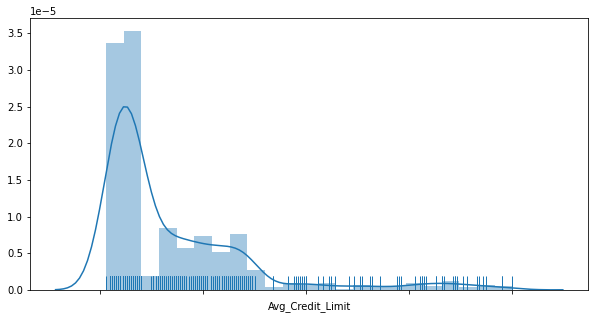

In [16]:
#High level view of average credit limit made
plt.figure(figsize=(10,5));
chart = sns.distplot(prepared_creditCard_data['Avg_Credit_Limit'],kde=True, rug=True);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);
plt.show();

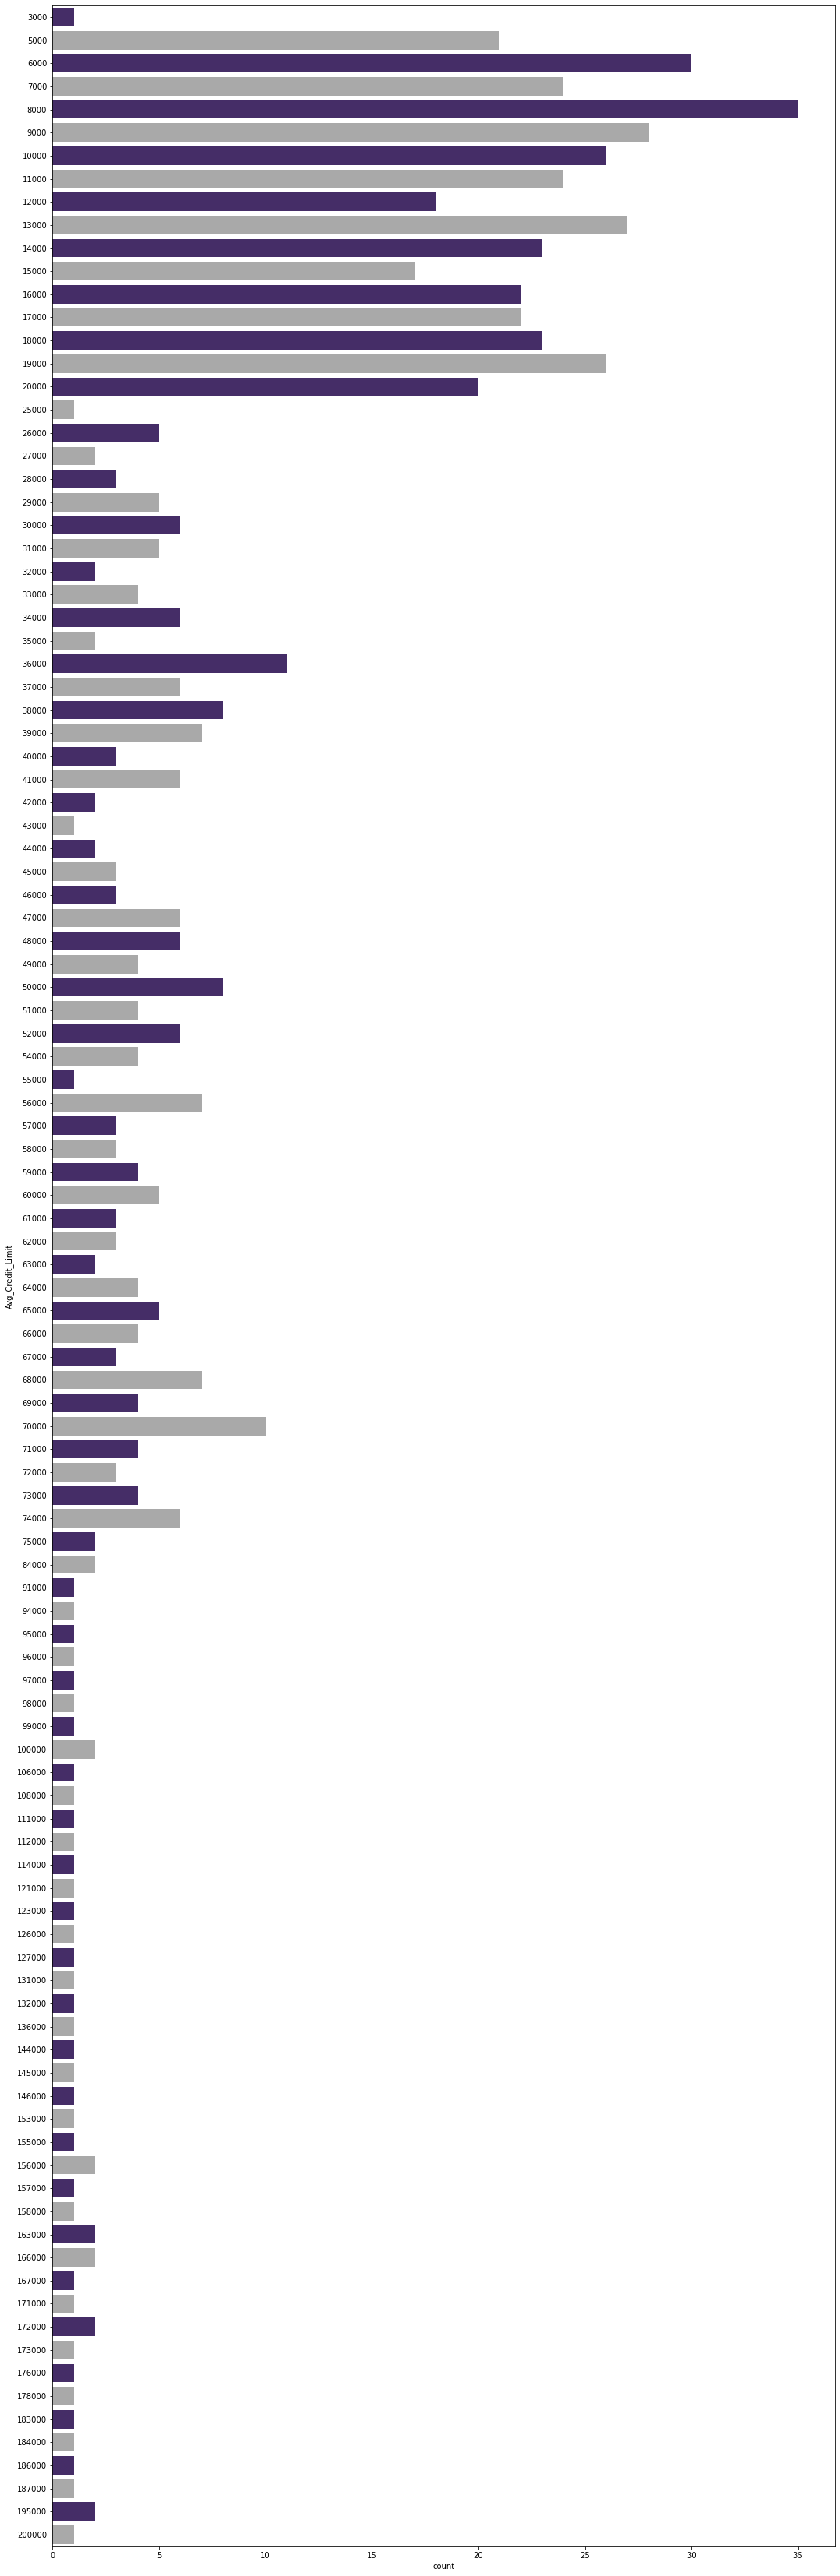

In [17]:
#In depth view of average credit limit
plt.figure(figsize=(18,60));
chart = sns.countplot( y =prepared_creditCard_data['Avg_Credit_Limit'], palette=['#432371',"#A9A9A9"]);
plt.show();

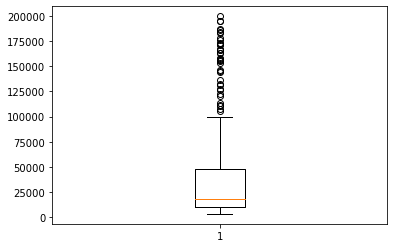

In [18]:
#Boxplot of the average credit card limit
plt.boxplot(prepared_creditCard_data['Avg_Credit_Limit']);

#analysis - it looks like the average credit card limit data is skewed highly as the 50% is 18k and the max is
# 200k as to be expected by the description up above. There are no MAJOR outliers to where I feel comfortable 
# removing a row. This would be different if they were gradual up to 175k and we had a random 500k in there. 

&nbsp;

#### Total Credit Cards

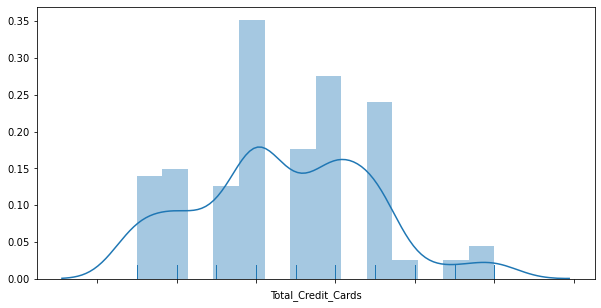

In [19]:
#High level view of total credit cards made
plt.figure(figsize=(10,5));
chart = sns.distplot(prepared_creditCard_data['Total_Credit_Cards'],kde=True, rug=True);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);
plt.show();

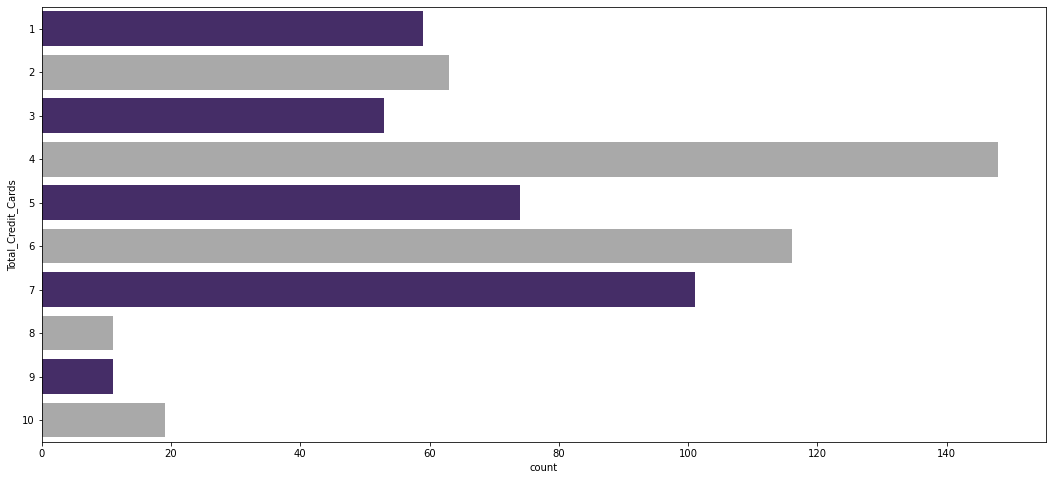

In [20]:
#In depth view of total credit cards
plt.figure(figsize=(18,8));
chart = sns.countplot( y =prepared_creditCard_data['Total_Credit_Cards'], palette=['#432371',"#A9A9A9"]);
plt.show();

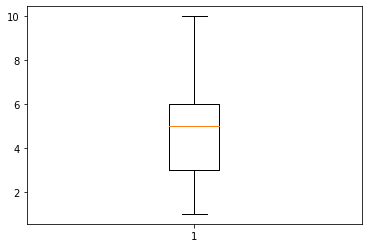

In [21]:
#Boxplot of the total credit cards
plt.boxplot(prepared_creditCard_data['Total_Credit_Cards']);

#analysis - it looks like the total credit cards data is not skewed much as the 50% is 5 and the max is
# 10 as to be expected by the description up above

&nbsp;

#### Total Visits Bank

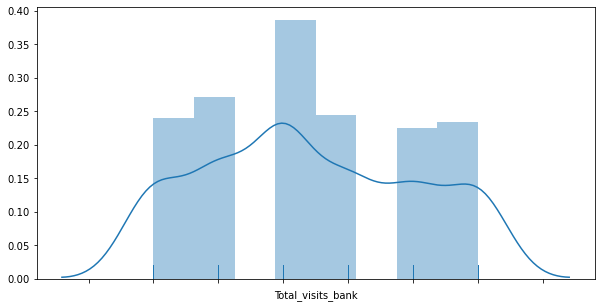

In [22]:
#High level view of total visits bank made
plt.figure(figsize=(10,5));
chart = sns.distplot(prepared_creditCard_data['Total_visits_bank'],kde=True, rug=True);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);
plt.show();

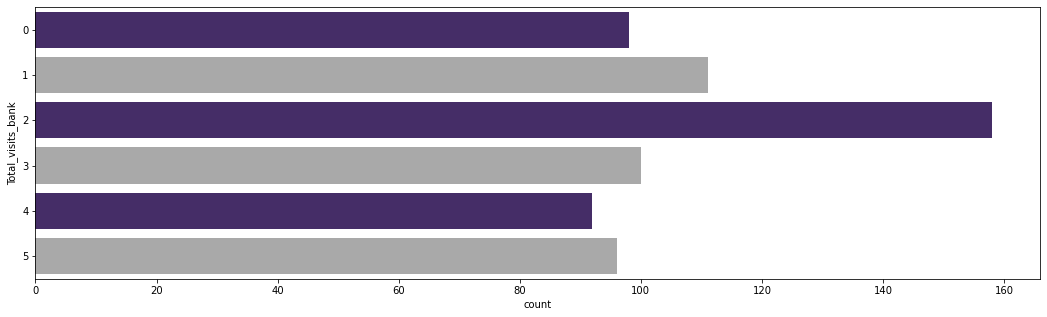

In [23]:
#In depth view of total visits bank 
plt.figure(figsize=(18,5));
chart = sns.countplot( y =prepared_creditCard_data['Total_visits_bank'], palette=['#432371',"#A9A9A9"]);
plt.show();

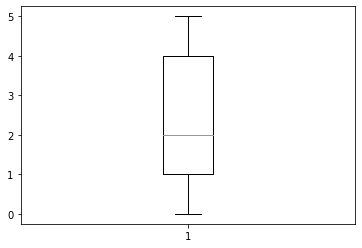

In [24]:
#Boxplot of the total bank visits
plt.boxplot(prepared_creditCard_data['Total_visits_bank']);

#analysis - it looks like the total bank visits data is not skewed too bad as the 50% is 2 and the max is
# 5 as to be expected by the description up above

&nbsp;

#### Total Visits Online

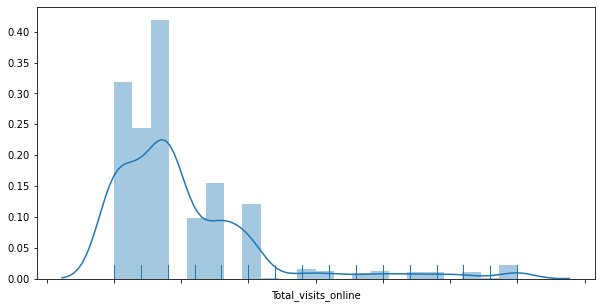

In [25]:
#High level view of total visits online made
plt.figure(figsize=(10,5));
chart = sns.distplot(prepared_creditCard_data['Total_visits_online'],kde=True, rug=True);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);
plt.show();

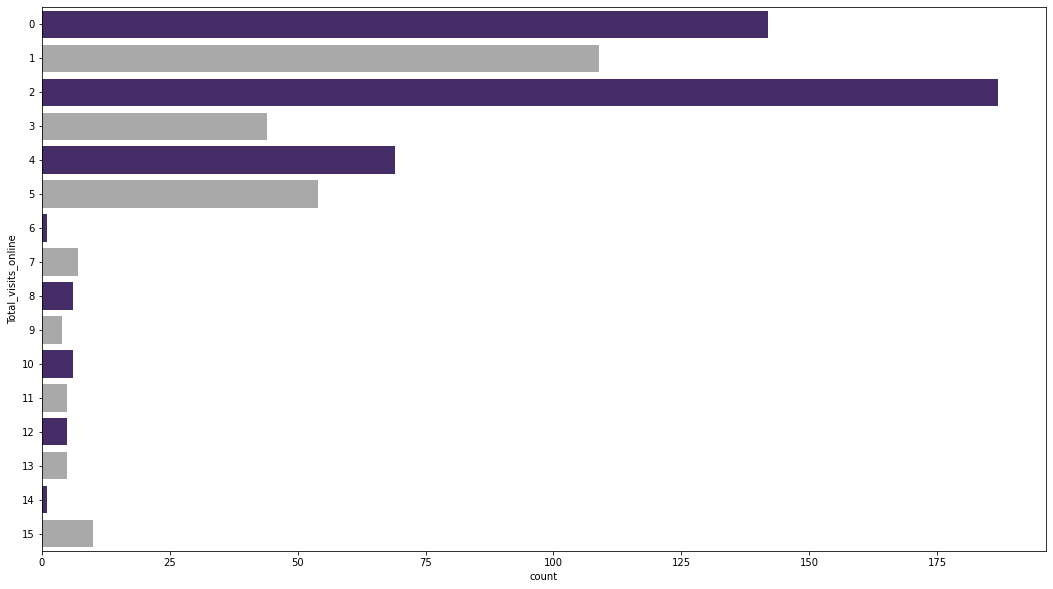

In [26]:
#In depth view of total visits online 
plt.figure(figsize=(18,10));
chart = sns.countplot( y =prepared_creditCard_data['Total_visits_online'], palette=['#432371',"#A9A9A9"]);
plt.show();

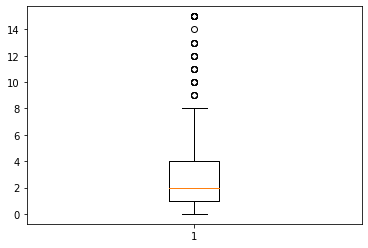

In [27]:
#Boxplot of the total online visits
plt.boxplot(prepared_creditCard_data['Total_visits_online']);

#analysis - it looks like the total online visits data is skewed as the 50% is 2 and the max is
# 15 as to be expected by the description up above

&nbsp;

#### Total Calls Made

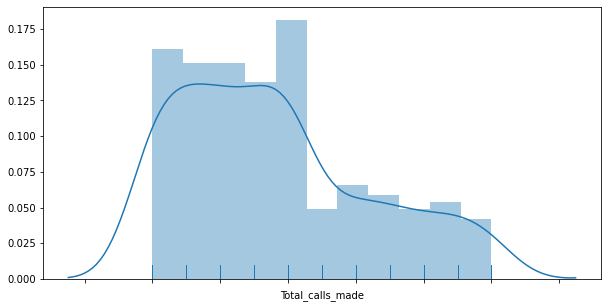

In [28]:
#High level view of total calls made
plt.figure(figsize=(10,5));
chart = sns.distplot(prepared_creditCard_data['Total_calls_made'],kde=True, rug=True);
chart.set_xticklabels(
    chart.get_xticklabels(),
    rotation=55,
    horizontalalignment='right',
    fontweight='light',
    fontsize='medium'
);
plt.show();

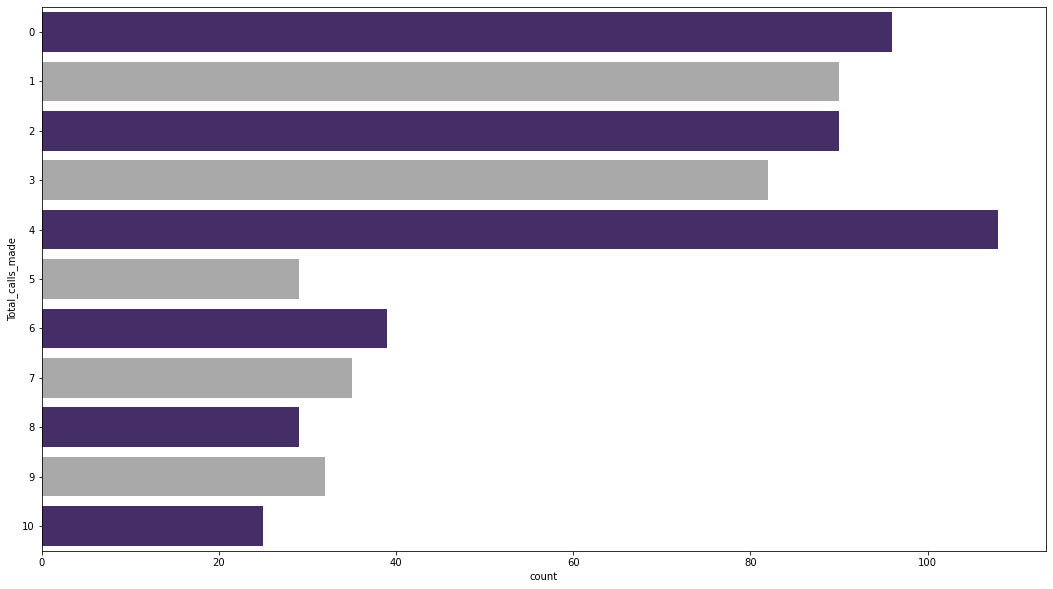

In [29]:
#In depth view of total calls made
plt.figure(figsize=(18,10));
chart = sns.countplot( y =prepared_creditCard_data['Total_calls_made'], palette=['#432371',"#A9A9A9"]);
plt.show();

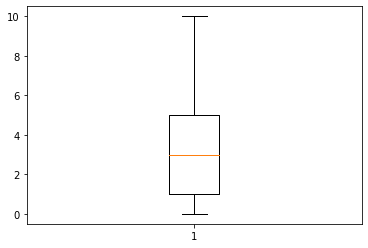

In [30]:
#Boxplot of the total calls made
plt.boxplot(prepared_creditCard_data['Total_calls_made']);

#analysis - it looks like the total calls made data is skewed very slightly as the 50% is 3 and the max is
# 10 as to be expected by the description up above

&nbsp;

### 6. Multivariate Analysis

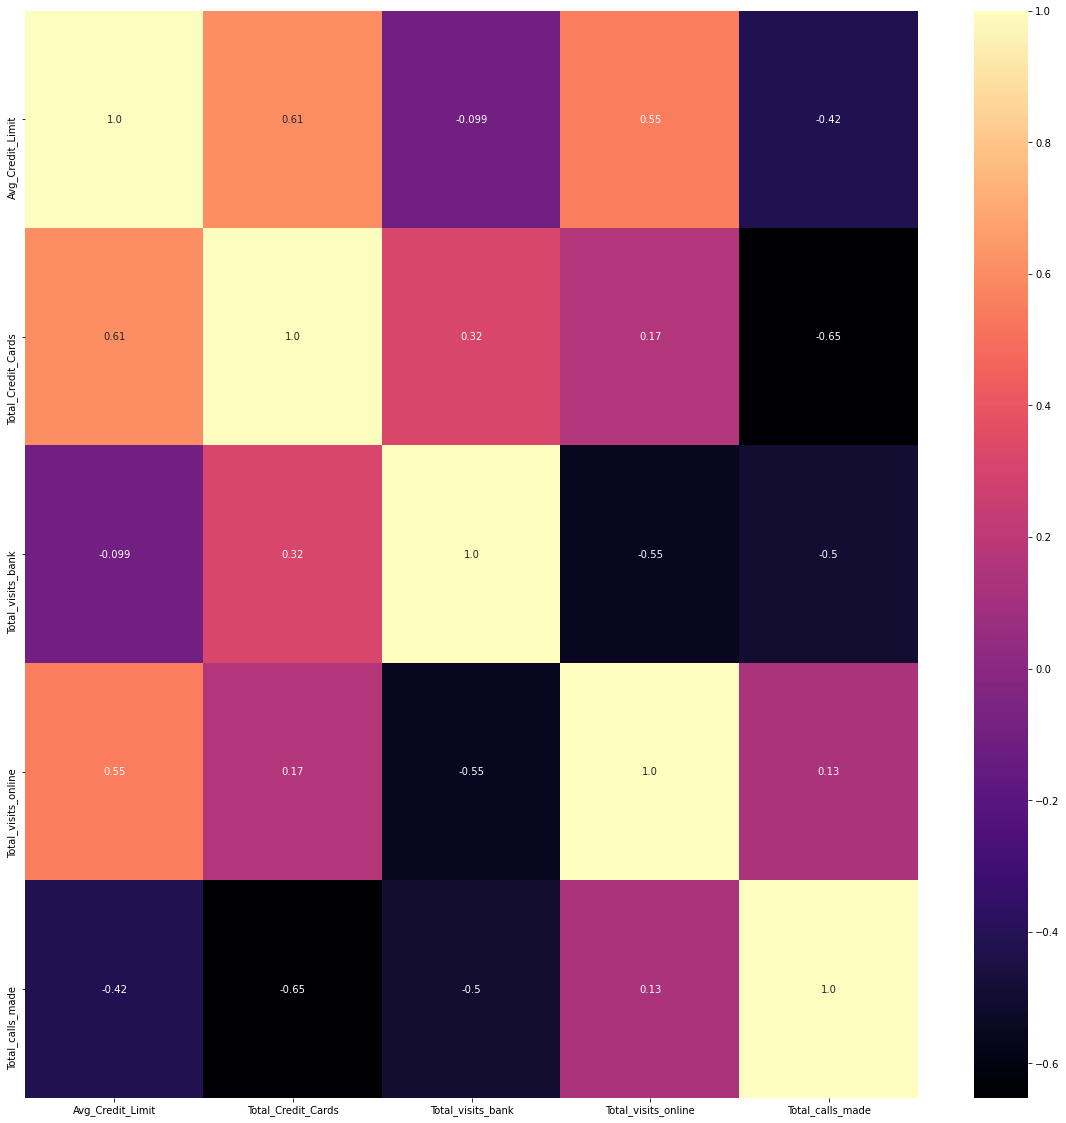

In [31]:
#credit card data heat map
plt.figure(figsize=(20,20))
sns.heatmap(prepared_creditCard_data.corr(),annot=True,fmt=".2",cmap='magma')
plt.show()


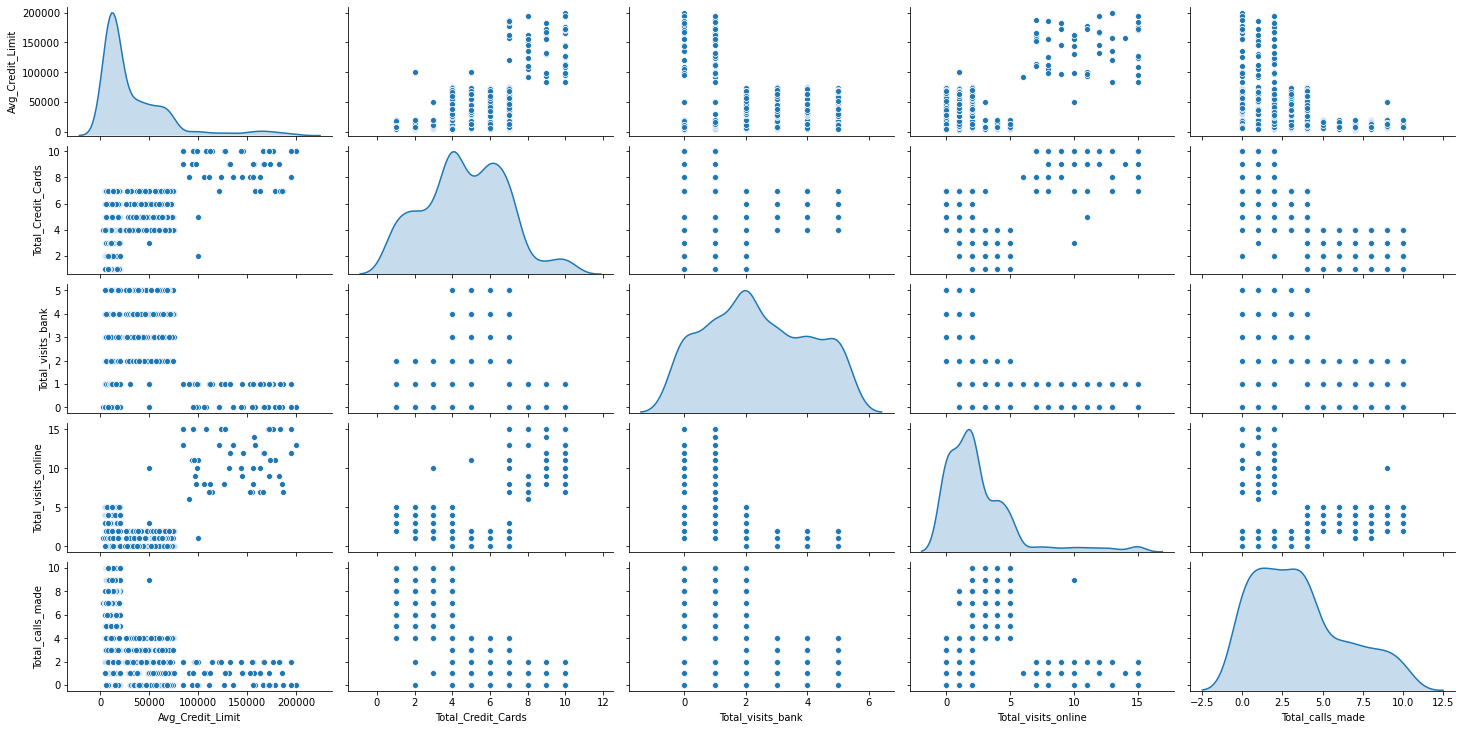

In [32]:
#credit card data pairplot
sns.pairplot(prepared_creditCard_data, height=2,aspect=2 , diag_kind='kde')
plt.show();

In [33]:
#credit card data correlation
prepared_creditCard_data.corr(method='kendall')

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Avg_Credit_Limit,1.000000,0.393688,0.082553,-0.081507,-0.328579
Total_Credit_Cards,0.393688,1.000000,0.300026,-0.246402,-0.494239
Total_visits_bank,0.082553,0.300026,1.000000,-0.510428,-0.371437
Total_visits_online,-0.081507,-0.246402,-0.510428,1.000000,0.311328
Total_calls_made,-0.328579,-0.494239,-0.371437,0.311328,1.000000


&nbsp;

### 7. Prepare Data

In [62]:
#Scale the data as needed for proper analysis so weight of all columns is similar scale
creditCardScaled_data=prepared_creditCard_data.apply(zscore)
creditCardScaled_data.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.739436,-1.249084,-0.864813,-0.548851,-1.252966
1,0.410337,-0.788414,-1.480522,2.535493,1.900849
2,0.410337,1.054266,-0.864813,0.136559,0.148730
3,-0.121303,0.132926,-0.864813,-0.548851,0.148730
5,-0.387123,-0.788414,-1.480522,-0.548851,1.550425
6,1.739436,0.132926,-1.480522,2.878198,-0.552118
7,-0.520033,-0.788414,-1.480522,-0.548851,-0.902542
8,-0.785853,-1.249084,-1.480522,-0.206146,-0.552118
9,-0.839017,-0.327744,-1.480522,-0.548851,1.200001
10,-0.652943,-0.327744,-1.480522,0.821969,0.499153


&nbsp;

### 8. Hierarchical Clustering

#### Set Up Linkages for Various Methods

In [48]:
# Set up various linkages
linkageWard = linkage(creditCardScaled_data, metric='euclidean', method='ward')
linkageAverage = linkage(creditCardScaled_data, metric='euclidean', method='average')
linkageCentroid = linkage(creditCardScaled_data, metric='euclidean', method='centroid')
linkageComplete = linkage(creditCardScaled_data, metric='euclidean', method='complete')

&nbsp;

#### Ward Method

In [83]:
# Get values for ward method
c_ward, cophenetic_dist_ward = cophenet(linkageWard, pdist(creditCardScaled_data))

print("Correlation Coefficiet for ward method: {}".format(c_ward))

Correlation Coefficiet for ward method: 0.7399284005362226


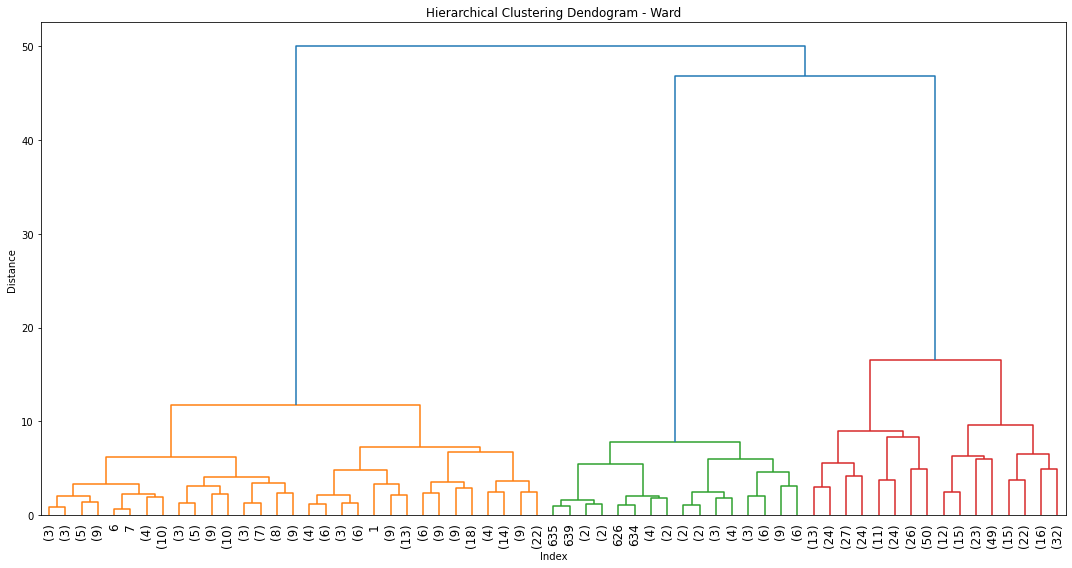

In [56]:
# Hierarchical Cluster Dendogram for ward
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendogram - Ward')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(linkageWard,truncate_mode='level', p=5, color_threshold = 30, leaf_font_size=12)
plt.tight_layout()

&nbsp;

#### Average Method

In [84]:
# Get values for average method
c_average, cophenetic_dist_average = cophenet(linkageAverage, pdist(creditCardScaled_data))

print("Correlation Coefficiet for average method: {}".format(c_average))

Correlation Coefficiet for average method: 0.8978313900952013


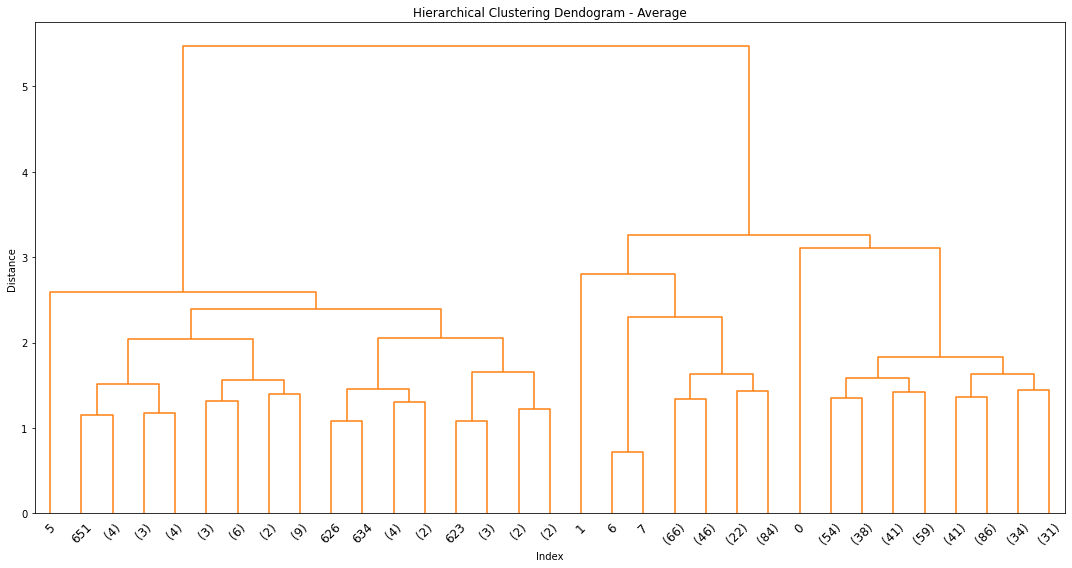

In [55]:
# Hierarchical Cluster Dendogram for average
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendogram - Average')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(linkageAverage,truncate_mode='level', p=5, color_threshold = 30, leaf_font_size=12)
plt.tight_layout()

&nbsp;

#### Centroid Method

In [85]:
# Get values for centroid method
c_centroid, cophenetic_dist_centroid = cophenet(linkageCentroid, pdist(creditCardScaled_data))

print("Correlation Coefficiet for centroid method: {}".format(c_centroid))

Correlation Coefficiet for centroid method: 0.8948399875872217


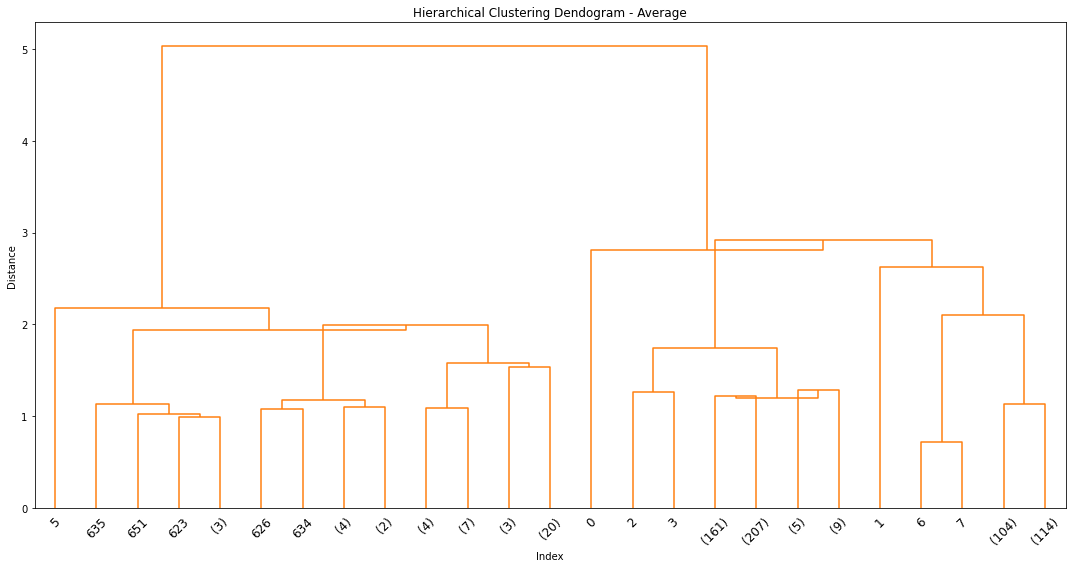

In [57]:
# Hierarchical Cluster Dendogram for centroid
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendogram - Average')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(linkageCentroid,truncate_mode='level', p=5, color_threshold = 30, leaf_font_size=12)
plt.tight_layout()

&nbsp;

#### Complete Method

In [86]:
# Get values for complete method
c_complete, cophenetic_dist_complete = cophenet(linkageComplete, pdist(creditCardScaled_data))

print("Correlation Coefficiet for complete method: {}".format(c_complete))

Correlation Coefficiet for complete method: 0.8667328091184989


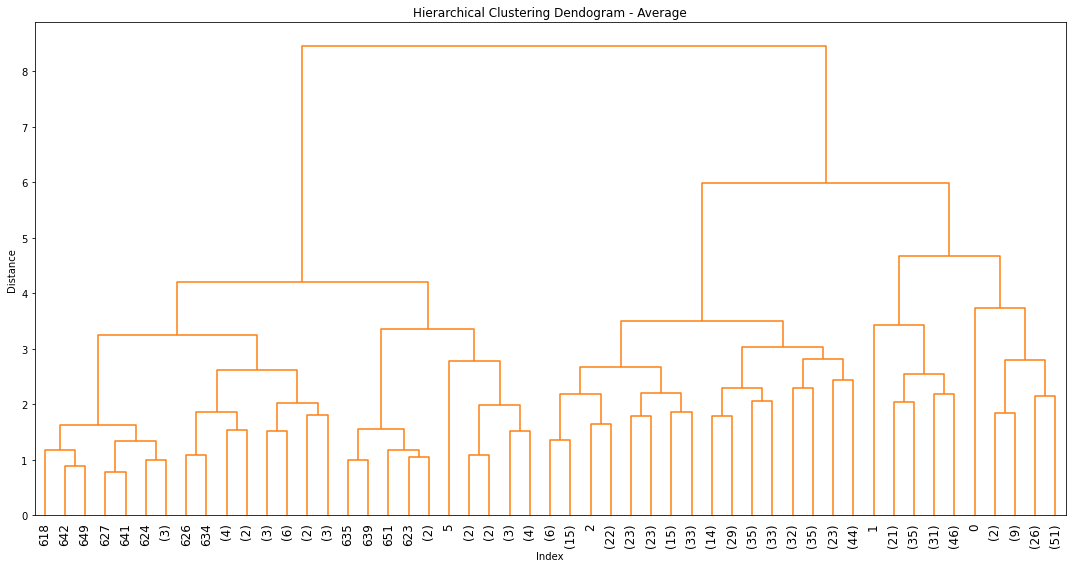

In [58]:
# Hierarchical Cluster Dendogram for complete
plt.figure(figsize=(15, 8))
plt.title('Hierarchical Clustering Dendogram - Average')
plt.xlabel('Index')
plt.ylabel('Distance')
dendrogram(linkageComplete,truncate_mode='level', p=5, color_threshold = 30, leaf_font_size=12)
plt.tight_layout()

&nbsp;

#### Build Model Based on Three Clusters

In [123]:
# Create and fit the hierarchical cluster model and get silhouettet score for average based on the 
# the best correlation coefficient score from above for average model
hierarchicalCluster_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
hierarchicalCluster_model.fit(creditCardScaled_data);
hierarchicalClusterPrediction = hierarchicalCluster_model.fit_predict(creditCardScaled_data);
hierarchicalClusterScore = silhouette_score(creditCardScaled_data,hierarchicalClusterPrediction);

print("Silhouette Score for the Hierarchical Cluster Model: {}".format(hierarchicalClusterScore))

Silhouette Score for the Hierarchical Cluster Model: 0.5158844992916211


In [124]:
# Look at the labels or groups that are associated with the model
hierarchicalCluster_lables = hierarchicalCluster_model.labels_
hierarchicalCluster_lables

array([0, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [125]:
prepared_creditCard_data.head(25)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7
10,10000,4,0,5,5


In [126]:
# need to use the original not scaled data set for analysis of groups by mean
prepared_hierarchical_data = prepared_creditCard_data.copy()
prepared_hierarchical_data["Group"] = hierarchicalClusterPrediction
prepared_hierarchical_data.head(25)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2
10,10000,4,0,5,5,2


In [127]:
# Group by clusters for analysis on division of clusters
hierarchicalData_notScaled_average = prepared_hierarchical_data.groupby(['Group'])
hierarchicalData_notScaled_average.mean()

#Analysis - the group 0 seems to be the middle of the pack for the avg credit card limit, middle for total credit cards,
# high end for total bank visits, low end for online visits and middle for the total calls made. 
# The group 1 seems to be the high average credit card limit, high for total credit cards, low for total bank visits, 
# really high for total visits online, and low for total calls made.
# The group 2 seems to be on the low end for the average credit total, low end for the total credit cards, low to mid for 
# total bank visits, med for total visits online, and high for total calls made. 

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,33740.25974,5.519481,3.477922,0.989610,2.010390
1,141877.55102,8.795918,0.612245,10.877551,1.040816
2,12203.61991,2.398190,0.932127,3.574661,6.864253


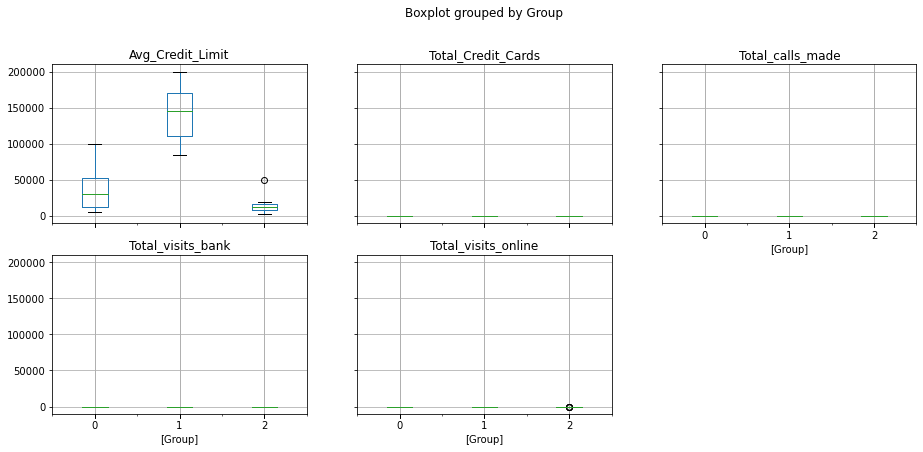

In [128]:
# Create the boxplots for the clusters formed with non-scaled data
#prepared_creditCard_data.boxplot(by='Group',layout=(3,3), figsize=(15,10));

# Create the boxplots for the clusters formed
prepared_hierarchical_data.boxplot(by='Group', layout=(3,3), figsize=(15,10));

&nbsp;

#### Try on scaled data just for my reference to compare the difference. 

In [65]:
# Add the group to the scaled dataframe for the clustering. I did this on the scaled data for a visual reference for myself to 
# evaluate the difference compared to the recommended non scaled data
creditCardScaled_hierarchical_data = creditCardScaled_data.copy()
creditCardScaled_hierarchical_data["Group"] = hierarchicalClusterPrediction
creditCardScaled_hierarchical_data['Group'] = creditCardScaled_hierarchical_data['Group'].astype('category')
creditCardScaled_hierarchical_data.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
Group                  category
dtype: object

In [75]:
# Find the mean values grouping by the clusters. I did this on the scaled data for a visual reference for myself to 
# evaluate the difference compared to the recommended non scaled data
hierarchicalData_average = creditCardScaled_hierarchical_data.groupby(['Group'])
hierarchicalData_average.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,-0.021880,0.372235,0.660866,-0.552412,-0.548478
1,2.852625,1.881592,-1.103557,2.836235,-0.888239
2,-0.594366,-1.065650,-0.906603,0.333498,1.152433


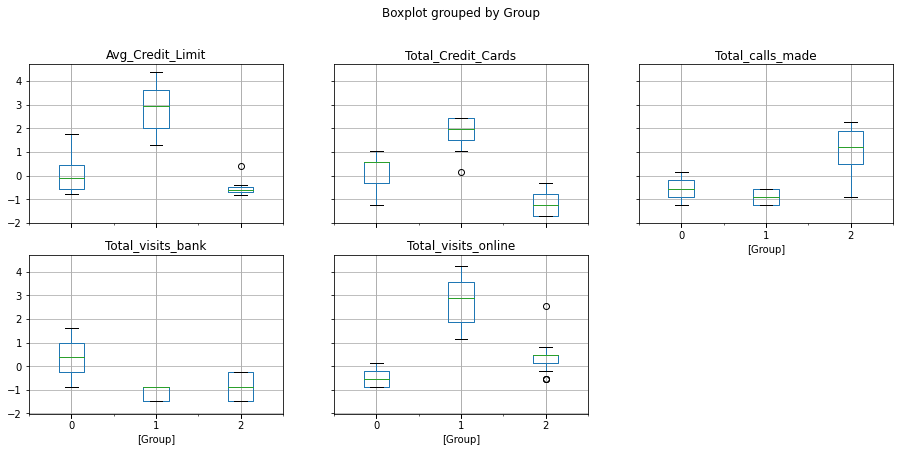

In [70]:
# Create the boxplots for the clusters formed
creditCardScaled_hierarchical_data.boxplot(by='Group', layout=(3,3), figsize=(15,10));

&nbsp;

### 9. K-Means Custering

In [39]:
# K Means clustering for the scaled data and iterate through 12 loops to get results
kmean_cluster_range = range(2,12)
kmean_cluster_errors = []
for cluster_number in kmean_cluster_range:
    kmeans_clusters = KMeans(cluster_number, n_init = 10)
    kmeans_clusters.fit(creditCardScaled_data)
    kmeans_labels = kmeans_clusters.labels_
    kmeans_centroids = kmeans_clusters.cluster_centers_
    kmean_cluster_errors.append(kmeans_clusters.inertia_)

kmeans_clusters_df = pd.DataFrame({"num_clusters": kmean_cluster_range, "cluster_errors": kmean_cluster_errors})
kmeans_clusters_df[0:12]

,num_clusters,cluster_errors
0,2,2023.593267
1,3,926.372729
2,4,774.569116
3,5,698.885703
4,6,636.825936
5,7,594.731429
6,8,556.572783
7,9,531.620629
8,10,501.202376
9,11,480.321933


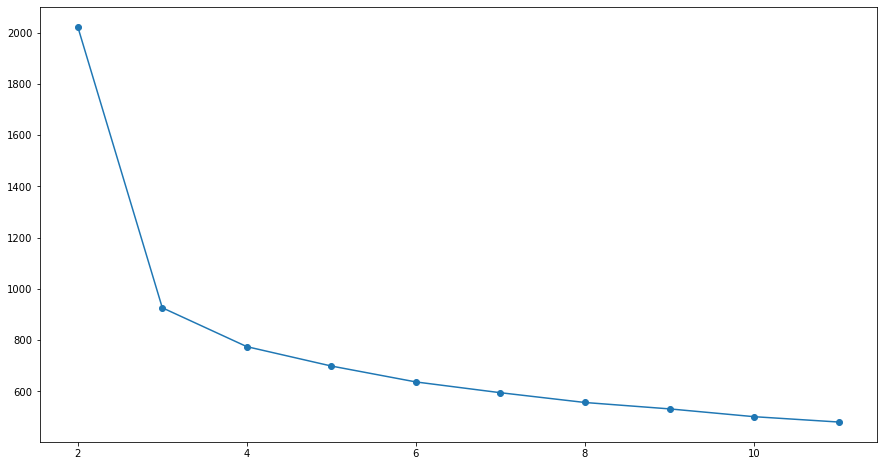

In [40]:
# plot the elbow graph to get a visual for the optimal number of clusters
plt.figure(figsize=(15,8));
plt.plot( kmeans_clusters_df.num_clusters, kmeans_clusters_df.cluster_errors, marker = "o" );

In [88]:
# validate based off of the elbow curve up above. 
# looks like major bend is at 3 so will create and specify the 3 clusters 
kmeans = KMeans(n_clusters=3, n_init = 10, random_state=7)
kmeans.fit(creditCardScaled_data)
kmeansPrediction = kmeans.fit_predict(creditCardScaled_data)
kmeansScore = silhouette_score(creditCardScaled_data,kmeansPrediction)

print("Silhouette Score for the KMeans Cluster Model: {}".format(kmeansScore))

Silhouette Score for the KMeans Cluster Model: 0.5156757893111308


In [132]:
# need to use the original not scaled data set for analysis of groups by mean
prepared_kmeans_data = prepared_creditCard_data.copy()
prepared_kmeans_data["Group"] = kmeansPrediction
prepared_kmeans_data.head(25)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,Group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
5,20000,3,0,1,8,1
6,100000,5,0,11,2,2
7,15000,3,0,1,1,1
8,5000,2,0,2,2,1
9,3000,4,0,1,7,1
10,10000,4,0,5,5,1


In [133]:
# Group by clusters for analysis on division of clusters
kmeansData_notScaled_average = prepared_kmeans_data.groupby(['Group'])
kmeansData_notScaled_average.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,33809.895833,5.523438,3.481771,0.986979,2.005208
1,12180.180180,2.405405,0.936937,3.567568,6.851351
2,141877.551020,8.795918,0.612245,10.877551,1.040816


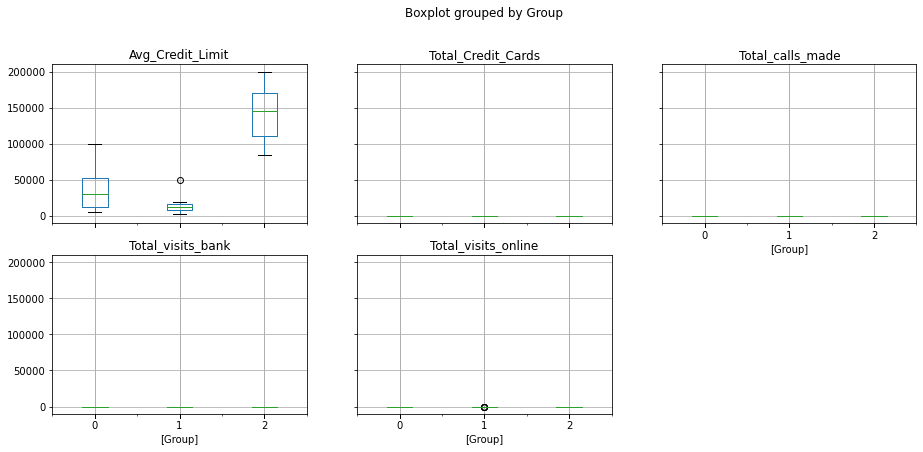

In [134]:
# Create the boxplots for the clusters formed
prepared_kmeans_data.boxplot(by='Group', layout=(3,3), figsize=(15,10));

In [140]:
# Add the group to the scaled dataframe for the clustering
creditCardScaled_kmeans_data = creditCardScaled_data.copy()
creditCardScaled_kmeans_data["Group"] = kmeansPrediction
creditCardScaled_kmeans_data['Group'] = creditCardScaled_kmeans_data['Group'].astype('category')
creditCardScaled_kmeans_data.dtypes

Avg_Credit_Limit        float64
Total_Credit_Cards      float64
Total_visits_bank       float64
Total_visits_online     float64
Total_calls_made        float64
Group                  category
dtype: object

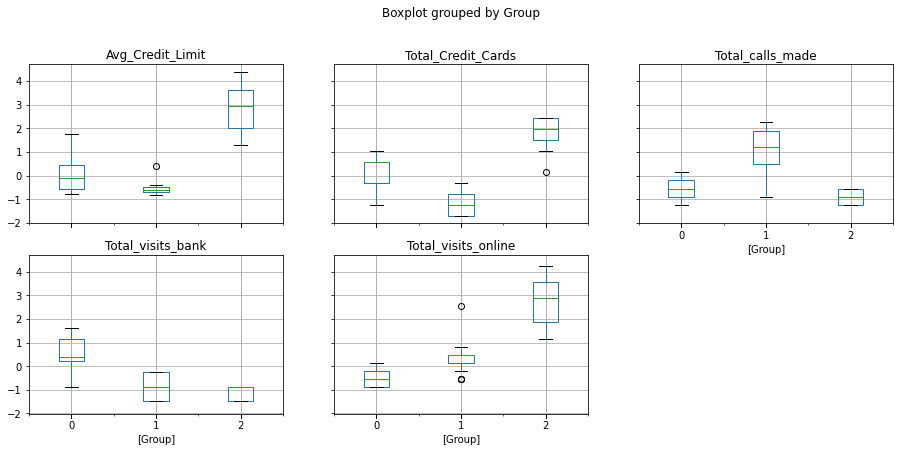

In [141]:
# Create the boxplots for the clusters formed
creditCardScaled_kmeans_data.boxplot(by='Group', layout=(3,3), figsize=(15,10));

In [42]:
# verification of the clusters from the elbow graph
for n_clusters in kmean_cluster_range:
    clusters = KMeans(n_clusters=n_clusters)
    prediction = clusters.fit_predict(creditCardScaled_data)
    cluster_centers = clusters.cluster_centers_
    
    score = silhouette_score(creditCardScaled_data,prediction)
    print("Number of clusters= {}, Silhouette score= {})".format(n_clusters, score))

# Analysis - this confirms that the elbow graph appears to be correct and could be used to verify the results
# if they were too small to determin from the elbow graph

Number of clusters= 2, Silhouette score= 0.4191048769542048)
Number of clusters= 3, Silhouette score= 0.5156757893111308)
Number of clusters= 4, Silhouette score= 0.35543523967554014)
Number of clusters= 5, Silhouette score= 0.2716282504058885)
Number of clusters= 6, Silhouette score= 0.25524399185447355)
Number of clusters= 7, Silhouette score= 0.23480185513420976)
Number of clusters= 8, Silhouette score= 0.2280201009272832)
Number of clusters= 9, Silhouette score= 0.21272376765110132)
Number of clusters= 10, Silhouette score= 0.20900072127488678)
Number of clusters= 11, Silhouette score= 0.20964197276516114)


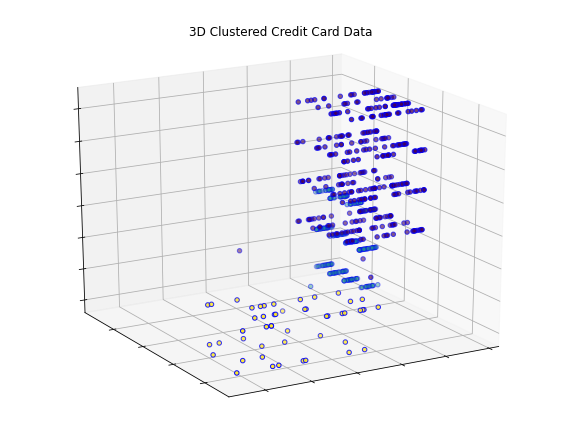

In [43]:
# Try out the 3d model for the cluster to see results
fig = plt.figure(figsize=(8, 6));
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60);
labels = kmeans.labels_
ax.scatter(creditCardScaled_data.iloc[:, 0], creditCardScaled_data.iloc[:, 1], creditCardScaled_data.iloc[:, 2],c=labels.astype(np.float), edgecolor='b');
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_title('3D Clustered Credit Card Data');

&nbsp;

### 10. Hierarchical Custering vs K-Means Custering Comparison

#### Hierarchical Clustering

##### Not Scaled

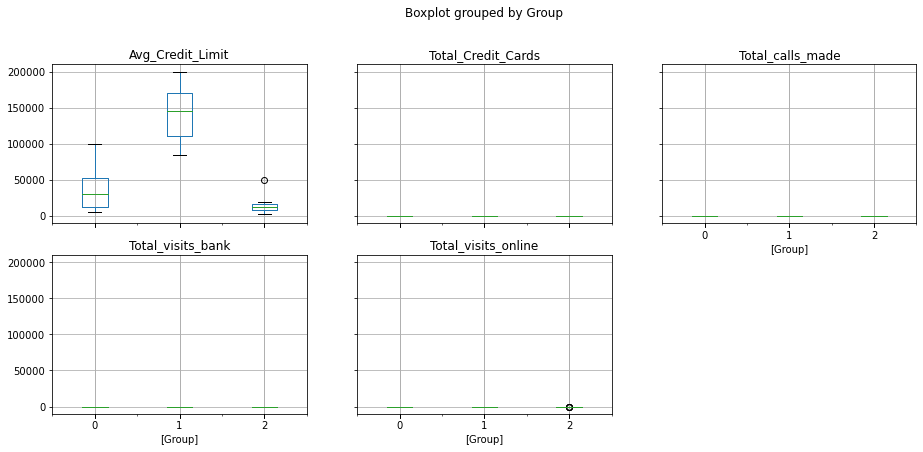

In [129]:
# Hierarchical boxplot for non-scaled data
prepared_hierarchical_data.boxplot(by='Group', layout=(3,3), figsize=(15,10));

In [139]:
# Hierarchical data not scaled mean values
hierarchicalData_notScaled_average.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,33740.25974,5.519481,3.477922,0.989610,2.010390
1,141877.55102,8.795918,0.612245,10.877551,1.040816
2,12203.61991,2.398190,0.932127,3.574661,6.864253


##### Scaled

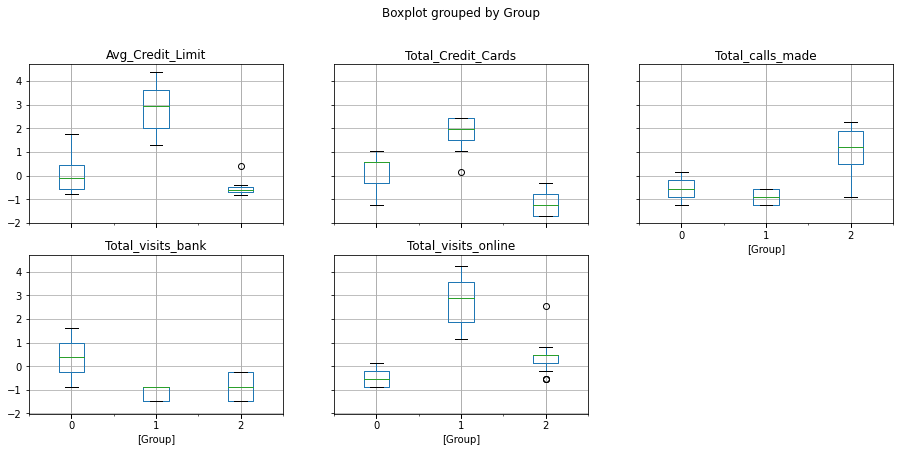

In [130]:
# Hierarchical boxplot for scaled data
creditCardScaled_hierarchical_data.boxplot(by='Group', layout=(3,3), figsize=(15,10));

Analysis - the group 0 seems to be the middle of the pack for the avg credit card limit, middle for total credit cards,
high end for total bank visits, low end for online visits and middle for the total calls made. 
The group 1 seems to be the high average credit card limit, high for total credit cards, low for total bank visits, 
really high for total visits online, and low for total calls made.
The group 2 seems to be on the low end for the average credit total, low end for the total credit cards, low to mid for 
total bank visits, med for total visits online, and high for total calls made. 

&nbsp;

#### KMeans Clustering

##### Not Scaled

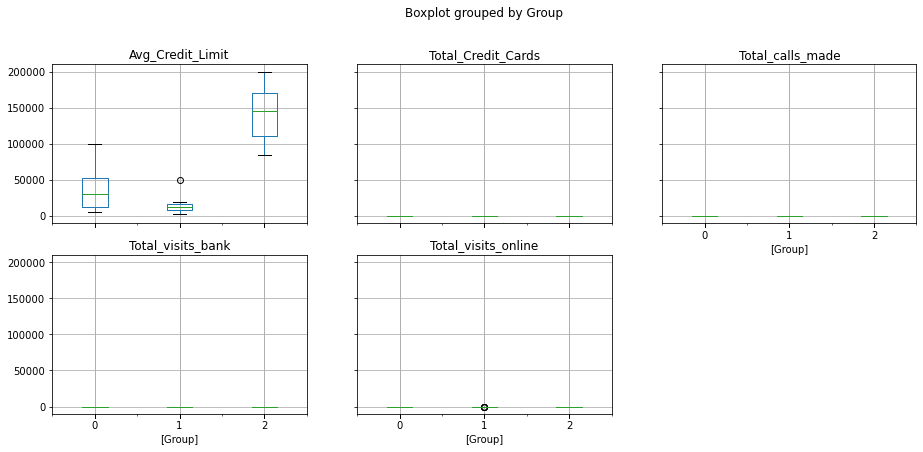

In [135]:
# KMeans boxplot for non-scaled data
prepared_kmeans_data.boxplot(by='Group', layout=(3,3), figsize=(15,10));

In [136]:
# KMeans data not scaled mean values
kmeansData_notScaled_average.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
Group,,,,,
0,33809.895833,5.523438,3.481771,0.986979,2.005208
1,12180.180180,2.405405,0.936937,3.567568,6.851351
2,141877.551020,8.795918,0.612245,10.877551,1.040816


##### Scaled

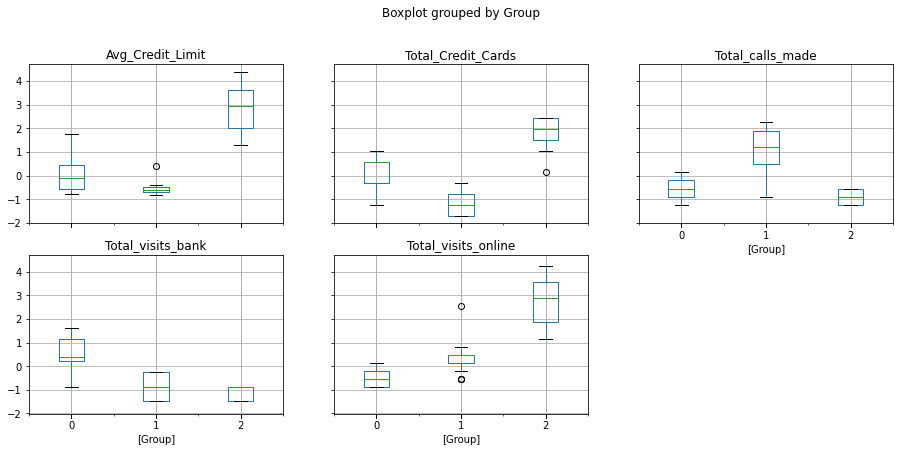

In [142]:
# KMeans boxplot for scaled data
creditCardScaled_kmeans_data.boxplot(by='Group', layout=(3,3), figsize=(15,10));

Analysis - the group 0 seems to be the middle of the pack for the avg credit card limit, middle for total credit cards,
high end for total bank visits, low end for online visits and middle for the total calls made. 
The group 1 seems to be the high average credit card limit, high for total credit cards, low for total bank visits, 
really high for total visits online, and low for total calls made.
The group 2 seems to be on the low end for the average credit total, low end for the total credit cards, low to mid for 
total bank visits, med for total visits online, and high for total calls made. 

The difference between the Hierchical and the KMeans seems to be pretty minimal by viewing the boxplots above. It seems that the scaled/unscaled versions appear in a different order but similar or same values presented in the boxplots and the mean values chart.  

&nbsp;

### 11. Cluster Analysis

#### How many different segments of customers are there?

There seems to be three segments of customers by the clustering above. They seem to be broken down in the following segments:
1.) High average credit card limit - high number of cards and seems to value online banking over other options and low number of calls.
2.) Middle average credit card limit - medium number of cards and seems to value visiting bank in person and medium number of calls.
3.) Low average credit card limit - low number of cards and seems to value a little bit of online banking and high number of calls.

#### How are these segments different from each other?

It seems that the average credit card limit notes how that specific customer prefers to interact with the banking institution and the number of credit cards that they have. The higher the credit card limit seems to note that they prefer the self serve options of banking over the lower credit card limit customers. 

#### What are your recommendations to the bank on how to better market to and service these customers?

The bank needs to look at the data and focus on how to market and serve the customers based on that data. If someone has a higher credit card limit, they need to be focused on the more self serve, automation and credit card options for premier customer service and satisfaction. If there is a low credit card limit, they need to be more focused on a personal touch and customer interaction. By finding out what category that customer falls into, they can focus on the best approach and services to offer that customer. 